In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.DEBUG) 

In [41]:
data=pd.read_csv('iris.csv')
# Converts the different class value strings to numeric for easy classification
def classMaking(value):
    if value=='setosa':
        return 0
    if value=='versicolor':
        return 1
    return 2
data['species']=data['species'].apply(classMaking)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# A1

In [42]:
# store mean 
meanstore=[]
# calculating mean for all classes using loop
for i in range(0,3):
    meanstore.append(np.mean(data[data['species']==i].iloc[:,0:4],axis=0))
    logging.info(f"Mean of class {i} : {meanstore[-1]}")
    logging.info(f"Std of class {i} : {np.std(data[data['species']==i].iloc[:,0:4],axis=0)}")

INFO:root:Mean of class 0 : sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64
INFO:root:Std of class 0 : sepal_length    0.348947
sepal_width     0.377195
petal_length    0.171767
petal_width     0.106132
dtype: float64
INFO:root:Mean of class 1 : sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64
INFO:root:Std of class 1 : sepal_length    0.510983
sepal_width     0.310644
petal_length    0.465188
petal_width     0.195765
dtype: float64
INFO:root:Mean of class 2 : sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64
INFO:root:Std of class 2 : sepal_length    0.629489
sepal_width     0.319255
petal_length    0.546348
petal_width     0.271890
dtype: float64


In [43]:
# calculating distance between centroids
for i in range(len(meanstore)-1):
    for j in range(i+1,len(meanstore)):
        logging.info(f"The distance between mean vectors of class {i} and class {j} is {np.linalg.norm(meanstore[j]-meanstore[i])}")

INFO:root:The distance between mean vectors of class 0 and class 1 is 3.2051745662288034
INFO:root:The distance between mean vectors of class 0 and class 2 is 4.752591714001951
INFO:root:The distance between mean vectors of class 1 and class 2 is 1.6204888151419004


# A2

INFO:root:1.1986666666666668
INFO:root:0.5824143176733783


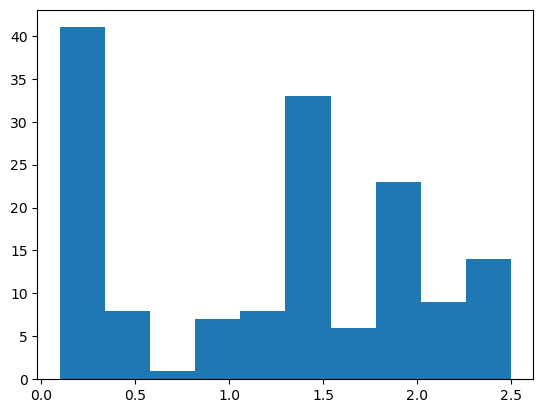

In [44]:
plt.hist(data['petal_width'])
logging.info(data['petal_width'].mean())
logging.info(data['petal_width'].std()**2)

# A3

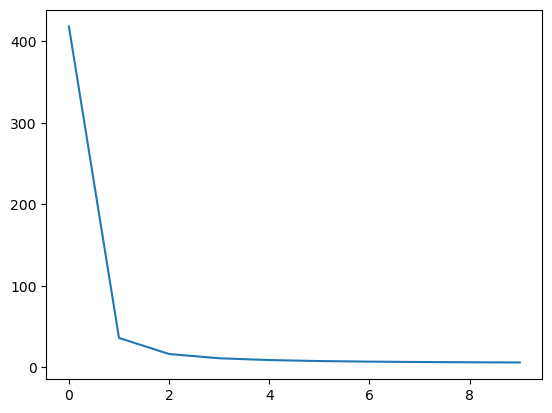

In [45]:
# Finding minkowski distance
answer=[]
for i in range(1,11):
    answer.append(sum(abs(data['sepal_length']-data['sepal_width'])**i)**(1/i))
plt.plot(range(0,10),answer)

# A4

In [46]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['species'])
Y=data['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

# A5

In [47]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# A6

In [48]:
neigh.score(x_test,y_test)

0.9777777777777777

# A7

In [49]:
neigh.predict(x_test)

array([2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2], dtype=int64)

# A8

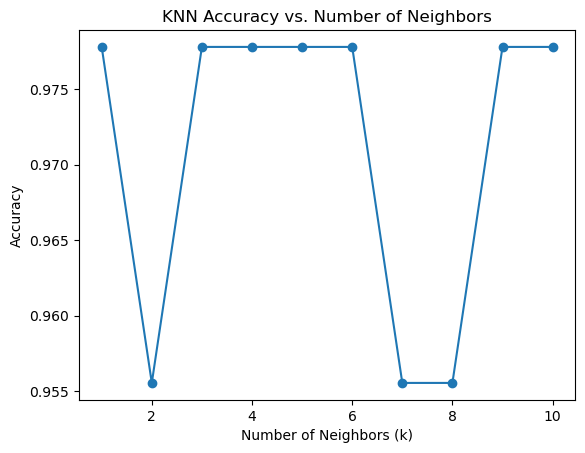

In [56]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []

for i in range(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    predictions = neigh.predict(x_test)
    acc = accuracy_score(y_test, predictions)  # Calculate accuracy
    accuracy.append(acc)

plt.plot(range(1, 11), accuracy, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.show()


# A9

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000224DCFD1220>


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.94      0.97      0.96        35
           2       0.97      0.94      0.96        34

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



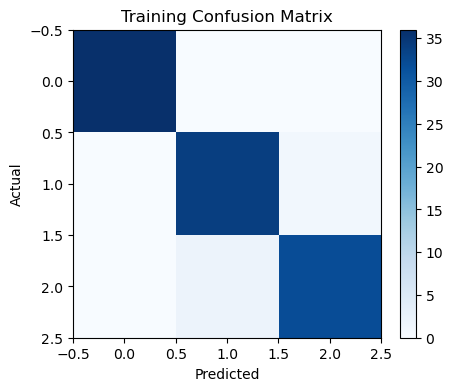

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000224DCF250A0>


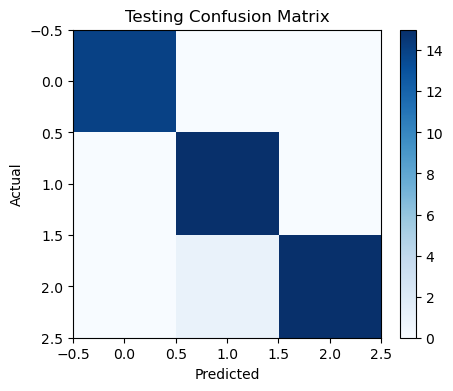

The model seems to be Regularly fitted.


In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_train_pred = neigh.predict(x_train)
y_test_pred = neigh.predict(x_test)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(train_cm, "Training Confusion Matrix")
plot_confusion_matrix(test_cm, "Testing Confusion Matrix")
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
if train_acc > 0.95 and test_acc < 0.80:
    print("The model is likely Overfitting.")
elif train_acc < 0.70 and test_acc < 0.70:
    print("The model is likely Underfitting.")
else:
    print("The model seems to be Regularly fitted.")